Data shape: (12, 5)
Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      12 non-null     float64
 1   x2      12 non-null     float64
 2   class   12 non-null     int64  
 3   x3      12 non-null     float64
 4   x4      12 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 608.0 bytes
None

Data:


,x1,x2,class,x3,x4
0,0.0,0.0,1,0.00,0.00
1,1.0,0.0,1,1.00,0.00
2,0.0,1.0,1,0.00,1.00
3,1.0,1.0,1,1.00,1.00
4,0.0,0.5,1,0.00,0.25
5,0.5,0.0,1,0.25,0.00
6,1.0,0.5,1,1.00,0.25
7,0.5,1.0,1,0.25,1.00
8,0.4,0.4,0,0.16,0.16
9,0.6,0.6,0,0.36,0.36


X shape: (12, 4)
y shape: (12,)


,x1,x2,x3,x4
0,0.0,0.0,0.0,0.00
1,1.0,0.0,1.0,0.00
2,0.0,1.0,0.0,1.00
3,1.0,1.0,1.0,1.00
4,0.0,0.5,0.0,0.25


Epochs executed: 4000
Final loss: 0.3790026903152466
Final accuracy: 1.0


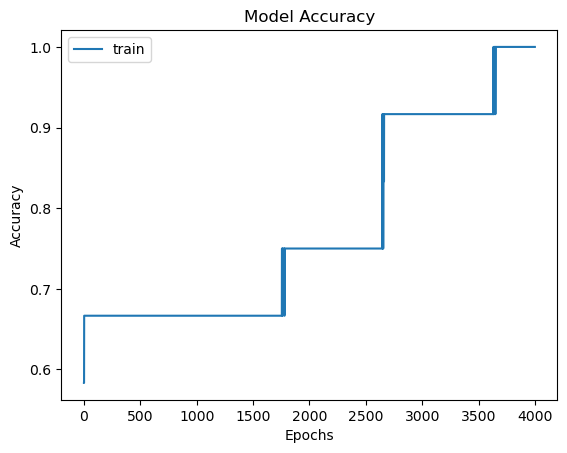

Predictions:
[[0.7347951 ]
 [0.87179476]
 [0.8712688 ]
 [0.9432168 ]
 [0.5771201 ]
 [0.5926565 ]
 [0.7700856 ]
 [0.78041625]
 [0.39595318]
 [0.48396498]
 [0.4393677 ]
 [0.4395991 ]]
Class 0 data:
     x1   x2    x3    x4
8   0.4  0.4  0.16  0.16
9   0.6  0.6  0.36  0.36
10  0.4  0.6  0.16  0.36
11  0.6  0.4  0.36  0.16


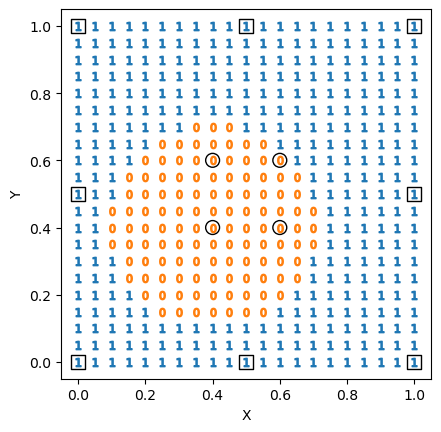

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os
import random
import tensorflow as tf

# Random seed setting
seedval = 24
tf.random.set_seed(seedval)
np.random.seed(seedval)
random.seed(seedval)
os.environ["PYTHONHASHSEED"] = str(seedval)

# Read CSV file
df = pd.read_csv('points_circle.csv', sep=',', skiprows=0, header=0)

# 1. Add squared columns x3 and x4
df['x3'] = df['x1'] ** 2
df['x4'] = df['x2'] ** 2

print('Data shape:', df.shape)
print('Data info:')
print(df.info())
print('\nData:')
display(df)

# 2. Preparation of data/class for train (4 input features)
X = df[['x1', 'x2', 'x3', 'x4']]  # 4 input features
y = df['class']  # teacher signal

print('X shape:', X.shape)
print('y shape:', y.shape)
display(X.head())

# 3. Definition of neural network (no hidden layers)
model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))  # Only output layer

# 4. Training with epochs=4000
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
fit_log = model.fit(X, y, epochs=4000, batch_size=1, verbose=0)

print('Epochs executed:', len(fit_log.history['loss']))
print('Final loss:', fit_log.history['loss'][-1])
print('Final accuracy:', fit_log.history['accuracy'][-1])

# Plot accuracy transition
plt.plot(fit_log.history['accuracy'], label='train')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Prediction (train data)
pred = model.predict(X, verbose=0)
print('Predictions:')
print(pred)

# Setup for separating hyperplane (teacher signal)
t1 = X[y == 1]
t0 = X[y == 0]
print('Class 0 data:')
print(t0)

t1_x = t1.iloc[:, 0]  # x1 column
t1_y = t1.iloc[:, 1]  # x2 column
t0_x = t0.iloc[:, 0]  # x1 column
t0_y = t0.iloc[:, 1]  # x2 column

# Setup for separating hyperplane (grid points)
g = pd.read_csv('grid01_21x21.csv', header=None)
# Add squared columns for grid data
g_extended = g.copy()
g_extended[2] = g[0] ** 2  # x3 = x1^2
g_extended[3] = g[1] ** 2  # x4 = x2^2

pred_g = model.predict(g_extended, verbose=0)[:, 0]
g1 = g[pred_g >= 0.5]
g0 = g[pred_g < 0.5]

g1_x = g1.iloc[:, 0]
g1_y = g1.iloc[:, 1]
g0_x = g0.iloc[:, 0]
g0_y = g0.iloc[:, 1]

# Plot separating hyperplane
plt.scatter(t1_x, t1_y, marker='s', facecolor='none', edgecolor='black', s=100)
plt.scatter(t0_x, t0_y, marker='o', facecolor='none', edgecolor='black', s=100)
plt.scatter(g1_x, g1_y, marker='$1$')
plt.scatter(g0_x, g0_y, marker='$0$')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()